In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/torrens-lake-metrological-data/Metadata_TorrensWaterData.pdf
/kaggle/input/torrens-lake-metrological-data/torrens/A5041055_Adelaide_Uni_Aug_2016.csv
/kaggle/input/torrens-lake-metrological-data/torrens/A5041056_Torrens_Weir_Dec_2016.csv
/kaggle/input/torrens-lake-metrological-data/torrens/A5041056_Torrens_Weir_May_2018.csv
/kaggle/input/torrens-lake-metrological-data/torrens/A5041056_Torrens_Weir_Apr_2018.csv
/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Jun_2017.csv
/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Sep_2016.csv
/kaggle/input/torrens-lake-metrological-data/torrens/A5041056_Torrens_Weir_Aug_2018.csv
/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Dec_2016.csv
/kaggle/input/torrens-lake-metrological-data/torrens/A5041056_Torrens_Weir_Jul_2018.csv
/kaggle/input/torrens-lake-metrological-data/torrens/A5041055_Adelaide_Uni_Sep_2017.csv
/kaggle/input/torrens-lake-metrological-data/

In [6]:
import pandas as pd
read_csv = pd.read_csv('/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Apr_2016.csv')

In [10]:
read_csv.head(5)

,,,,,,,,,,,,,,Friendly Name:A5041054 - Adelaide Zoo
TIMESTAMP,batt_volts,modem_resets,WTemp,E_Cond,O2_percent,O2_mg,TAC_temp(1),TAC_temp(2),TAC_temp(3),TAC_temp(4),TAC_temp(5),TAC_temp(6),TAC_errorsensors,Sp_Cond
TS,V,d,C,uS/cm,%,mg/L,C,C,C,C,C,C,d,uS/cm
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01 00:00:00,12.95,107.0,19.29,1026.0,13.7,1.26,18.92,18.98,18.85,18.98,18.67,18.54,0.0,1151.0
2016-04-01 00:15:00,12.95,107.0,19.25,1030.0,13.7,1.26,18.85,18.98,18.79,18.92,18.67,18.54,0.0,1157.0


In [3]:
# lets combine all files into single piece files name starts with A5041054**_.csv for adelaide_zoo
import glob
import numpy as np
import os

file_path = "/kaggle/input/torrens-lake-metrological-data/torrens/"

combined_files = glob.glob(os.path.join(file_path,"A5041054**.csv"))


In [4]:
combined_files

['/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Jun_2017.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Sep_2016.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Dec_2016.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Nov_2016.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_May_2016.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Jan_2016.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Oct_2015.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Jul_2015.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Oct_2017.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Nov_2015.csv',
 '/kaggle/input/torrens-lake-metrological-data/torrens/A5041054_Adelaide_Zoo_Jan

In [5]:
# Read and combine all CSVs into one DataFrame
rename_col = {
    'TS': 'TIMESTAMP',
    'V': 'batt_volts',
    'd': 'modem_resets',
    'C': 'WaterTemp',
    'uS/cm': 'Electrical_Conductivity',
    '%': 'O2_percent',
    'mg/L': 'O2_mg',
    'C.1': 'TAC_temp(0.1 m)',
    'C.2': 'TAC_temp(0.2 m)',
    'C.3': 'TAC_temp(0.3 m)',
    'C.4': 'TAC_temp(0.4 m)',
    'C.5': 'TAC_temp(0.5 m)',
    'C.6': 'TAC_temp(0.6 m)',
    'd.1': 'TAC_errorsensors',
    'uS/cm.1': 'Sp_Cond'
}


combined_df_Adl_zoo = pd.concat([
    pd.read_csv(file, skiprows=2).assign(
        SITE="Adelaide Zoo"
    ).rename(columns=rename_col)
    for file in combined_files
], ignore_index=True)

# View first few rows
combined_df_Adl_zoo.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TIMESTAMP,batt_volts,modem_resets,WaterTemp,Electrical_Conductivity,O2_percent,O2_mg,TAC_temp(0.1 m),TAC_temp(0.2 m),TAC_temp(0.3 m),TAC_temp(0.4 m),TAC_temp(0.5 m),TAC_temp(0.6 m),TAC_errorsensors,Sp_Cond,SITE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adelaide Zoo
1,2017-06-01 00:00:00,12.93,7999.0,13.02,313.0,3.0,0.31,12.31,12.75,12.75,12.87,12.75,12.93,0.0,406.0,Adelaide Zoo
2,2017-06-01 00:15:00,12.95,7999.0,13.02,314.0,3.0,0.31,12.25,12.75,12.75,12.81,12.75,13.00,0.0,407.0,Adelaide Zoo
3,2017-06-01 00:30:00,12.94,7999.0,13.01,315.0,2.9,0.31,12.37,12.75,12.75,12.81,12.75,12.93,0.0,409.0,Adelaide Zoo
4,2017-06-01 00:45:00,12.93,7999.0,13.00,316.0,2.9,0.31,12.18,12.75,12.68,12.81,12.75,12.87,0.0,410.0,Adelaide Zoo


In [7]:
len(combined_df_Adl_zoo)

112698

In [8]:
# sort the combined_df_Adl_zoo data based on timestamp

# makeing sure df timestamp is in pd datetime format

combined_df_Adl_zoo['TIMESTAMP'] = pd.to_datetime(combined_df_Adl_zoo["TIMESTAMP"], errors="coerce")

# sort by timestamp
combined_df_Adl_zoo = combined_df_Adl_zoo.sort_values("TIMESTAMP").reset_index(drop =True)


In [9]:
combined_df_Adl_zoo.tail(50)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TIMESTAMP,batt_volts,modem_resets,WaterTemp,Electrical_Conductivity,O2_percent,O2_mg,TAC_temp(0.1 m),TAC_temp(0.2 m),TAC_temp(0.3 m),TAC_temp(0.4 m),TAC_temp(0.5 m),TAC_temp(0.6 m),TAC_errorsensors,Sp_Cond,SITE
112648,2018-09-07 10:15:00,12.66,7999.0,13.61,855.0,4.1,0.43,14.74,13.50,13.25,13.18,13.37,13.93,0.0,1092.0,Adelaide Zoo
112649,2018-09-07 10:30:00,12.66,7999.0,13.59,855.0,4.2,0.43,14.74,13.43,13.18,13.25,13.43,13.93,0.0,1093.0,Adelaide Zoo
112650,2018-09-07 10:45:00,12.66,7999.0,13.57,855.0,4.3,0.45,14.87,13.50,13.31,13.31,13.43,13.99,0.0,1094.0,Adelaide Zoo
112651,2018-09-07 11:00:00,12.66,7999.0,13.59,856.0,4.3,0.44,14.62,13.50,13.25,13.18,13.37,13.99,0.0,1095.0,Adelaide Zoo
112652,2018-09-07 11:15:00,12.64,7999.0,13.58,857.0,4.5,0.46,14.87,13.68,13.37,13.31,13.37,13.93,0.0,1096.0,Adelaide Zoo
112653,2018-09-07 11:30:00,12.65,7999.0,13.61,857.0,4.5,0.47,14.99,13.81,13.37,13.37,13.43,13.93,0.0,1096.0,Adelaide Zoo
112654,2018-09-07 11:45:00,12.65,7999.0,13.64,859.0,4.3,0.44,15.30,13.87,13.37,13.37,13.43,13.99,0.0,1097.0,Adelaide Zoo
112655,2018-09-07 12:00:00,12.64,7999.0,13.68,860.0,4.3,0.44,15.49,14.06,13.50,13.43,13.49,13.99,0.0,1097.0,Adelaide Zoo
112656,2018-09-07 12:15:00,12.64,7999.0,13.75,861.0,4.2,0.44,15.55,14.31,13.56,13.43,13.49,13.99,0.0,1097.0,Adelaide Zoo
112657,2018-09-07 12:30:00,12.64,7999.0,13.85,864.0,4.3,0.45,15.74,14.43,13.68,13.50,13.56,13.93,0.0,1098.0,Adelaide Zoo


In [10]:
# Cleaning process

# check for null values
combined_df_Adl_zoo.isnull().sum()

TIMESTAMP                    40
batt_volts                   40
modem_resets                 40
WaterTemp                    50
Electrical_Conductivity      40
O2_percent                   40
O2_mg                        40
TAC_temp(0.1 m)              40
TAC_temp(0.2 m)              40
TAC_temp(0.3 m)              40
TAC_temp(0.4 m)              40
TAC_temp(0.5 m)              40
TAC_temp(0.6 m)              40
TAC_errorsensors           4632
Sp_Cond                      40
SITE                          0
dtype: int64

In [11]:
Cleaned_df_Adl_Zoo = combined_df_Adl_zoo.dropna(subset=['TIMESTAMP', 'WaterTemp'])

In [12]:
Cleaned_df_Adl_Zoo.isnull().sum()

TIMESTAMP                     0
batt_volts                    0
modem_resets                  0
WaterTemp                     0
Electrical_Conductivity       0
O2_percent                    0
O2_mg                         0
TAC_temp(0.1 m)               0
TAC_temp(0.2 m)               0
TAC_temp(0.3 m)               0
TAC_temp(0.4 m)               0
TAC_temp(0.5 m)               0
TAC_temp(0.6 m)               0
TAC_errorsensors           4592
Sp_Cond                       0
SITE                          0
dtype: int64

In [13]:
# lets fill the null values of TAC_errorsensors with mean values

mean_val = Cleaned_df_Adl_Zoo['TAC_errorsensors'].mean()
# Fill null values with the mean
Cleaned_df_Adl_Zoo.loc[:,"TAC_errorsensors"] = Cleaned_df_Adl_Zoo["TAC_errorsensors"].fillna(mean_val)


In [14]:
Cleaned_df_Adl_Zoo

,TIMESTAMP,batt_volts,modem_resets,WaterTemp,Electrical_Conductivity,O2_percent,O2_mg,TAC_temp(0.1 m),TAC_temp(0.2 m),TAC_temp(0.3 m),TAC_temp(0.4 m),TAC_temp(0.5 m),TAC_temp(0.6 m),TAC_errorsensors,Sp_Cond,SITE
0,2015-06-01 00:00:00,13.00,15.0,14.83,536.0,2.9,0.29,14.55,14.68,14.56,14.68,14.55,14.68,0.0,665.0,Adelaide Zoo
1,2015-06-01 00:15:00,13.00,15.0,14.82,535.0,2.4,0.25,14.49,14.68,14.56,14.68,14.55,14.74,0.0,664.0,Adelaide Zoo
2,2015-06-01 00:30:00,13.00,15.0,14.81,533.0,2.3,0.23,14.43,14.68,14.49,14.62,14.55,14.68,0.0,662.0,Adelaide Zoo
3,2015-06-01 00:45:00,12.97,15.0,14.80,532.0,2.2,0.22,14.43,14.62,14.49,14.62,14.49,14.68,0.0,661.0,Adelaide Zoo
4,2015-06-01 01:00:00,12.99,15.0,14.78,532.0,1.8,0.18,14.43,14.62,14.49,14.62,14.49,14.68,0.0,660.0,Adelaide Zoo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112653,2018-09-07 11:30:00,12.65,7999.0,13.61,857.0,4.5,0.47,14.99,13.81,13.37,13.37,13.43,13.93,0.0,1096.0,Adelaide Zoo
112654,2018-09-07 11:45:00,12.65,7999.0,13.64,859.0,4.3,0.44,15.30,13.87,13.37,13.37,13.43,13.99,0.0,1097.0,Adelaide Zoo
112655,2018-09-07 12:00:00,12.64,7999.0,13.68,860.0,4.3,0.44,15.49,14.06,13.50,13.43,13.49,13.99,0.0,1097.0,Adelaide Zoo
112656,2018-09-07 12:15:00,12.64,7999.0,13.75,861.0,4.2,0.44,15.55,14.31,13.56,13.43,13.49,13.99,0.0,1097.0,Adelaide Zoo


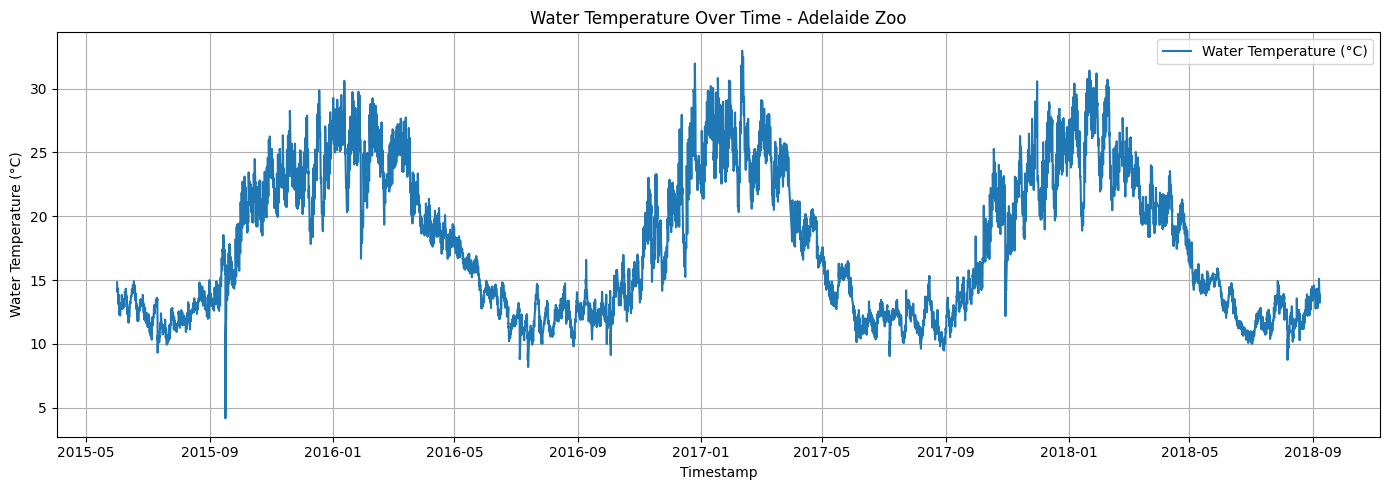

In [15]:
import matplotlib.pyplot as plt

# Plot WTemp (or any other parameter)
plt.figure(figsize=(14, 5))
plt.plot(Cleaned_df_Adl_Zoo["TIMESTAMP"], Cleaned_df_Adl_Zoo["WaterTemp"], label="Water Temperature (°C)")
plt.xlabel("Timestamp")
plt.ylabel("Water Temperature (°C)")
plt.title("Water Temperature Over Time - Adelaide Zoo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Water Quality Parameters - Adelaide Zoo'}, xlabel='TIMESTAMP'>

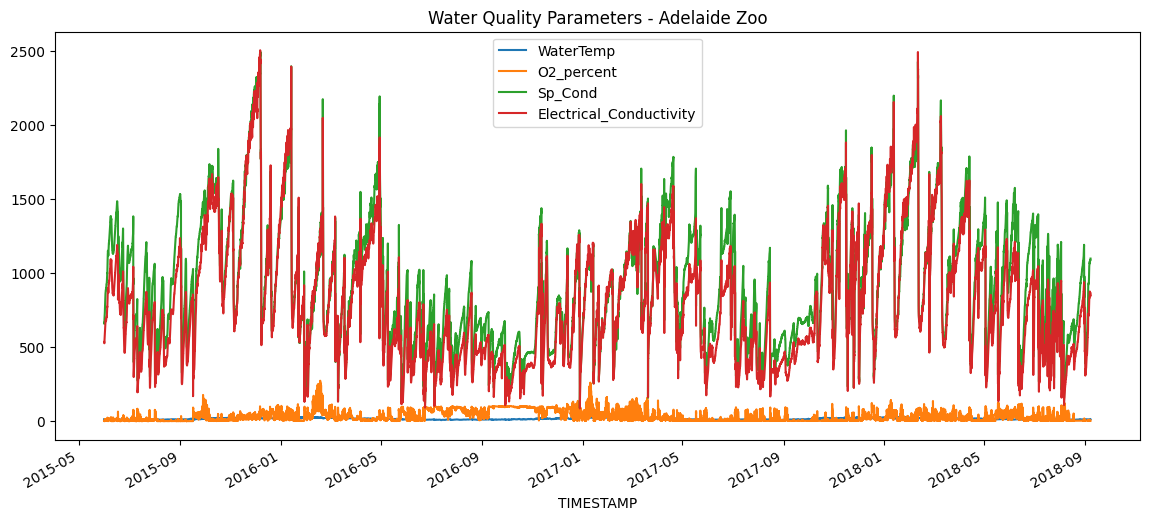

In [18]:
# lets plot multi-variable time series plot

Cleaned_df_Adl_Zoo.set_index("TIMESTAMP")[["WaterTemp", "O2_percent", "Sp_Cond", "Electrical_Conductivity"]].plot(figsize=(14, 6), title="Water Quality Parameters - Adelaide Zoo")


In [19]:
# lets find the correlation between the variables doing pearson correlation test

from scipy.stats import pearsonr
from itertools import combinations
import pandas as pd

#  columns of interest
columns = ["WaterTemp", "Electrical_Conductivity", "Sp_Cond", "O2_percent"]

# Run pairwise correlation tests
results = []

for var1, var2 in combinations(columns,2):
    corr, p = pearsonr(Cleaned_df_Adl_Zoo[var1], Cleaned_df_Adl_Zoo[var2])
    results.append({
        "Variable 1": var1,
        "Variable 2": var2,
        "Pearson r": round(corr, 3),
        "P-value": round(p, 5),
        "Significant?": "✅ Yes" if p < 0.05 else "❌ No"
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

,Variable 1,Variable 2,Pearson r,P-value,Significant?
0,WaterTemp,Electrical_Conductivity,0.602,0.0,✅ Yes
1,WaterTemp,Sp_Cond,0.426,0.0,✅ Yes
2,WaterTemp,O2_percent,0.069,0.0,✅ Yes
3,Electrical_Conductivity,Sp_Cond,0.974,0.0,✅ Yes
4,Electrical_Conductivity,O2_percent,-0.152,0.0,✅ Yes
5,Sp_Cond,O2_percent,-0.212,0.0,✅ Yes


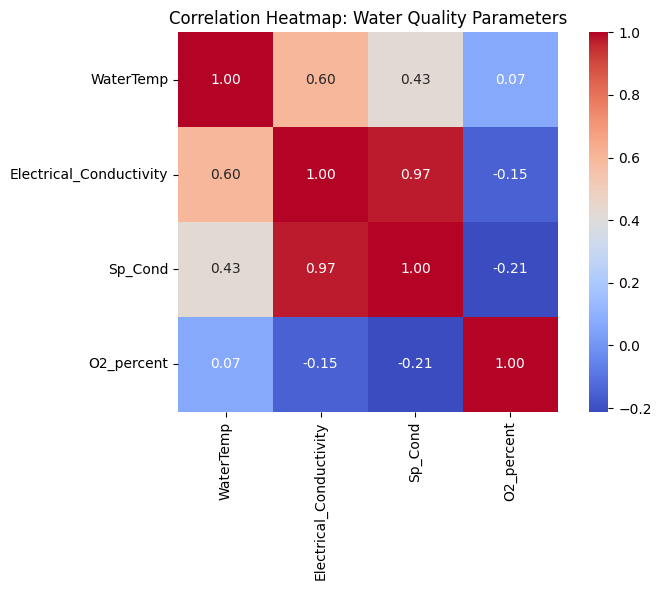

In [20]:
# lets do plot a heatmap and pairwise scatter plot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Subset the 4 variables
cols = ["WaterTemp", "Electrical_Conductivity", "Sp_Cond", "O2_percent"]
df_plot = Cleaned_df_Adl_Zoo[cols]

#  Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_plot.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap: Water Quality Parameters")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

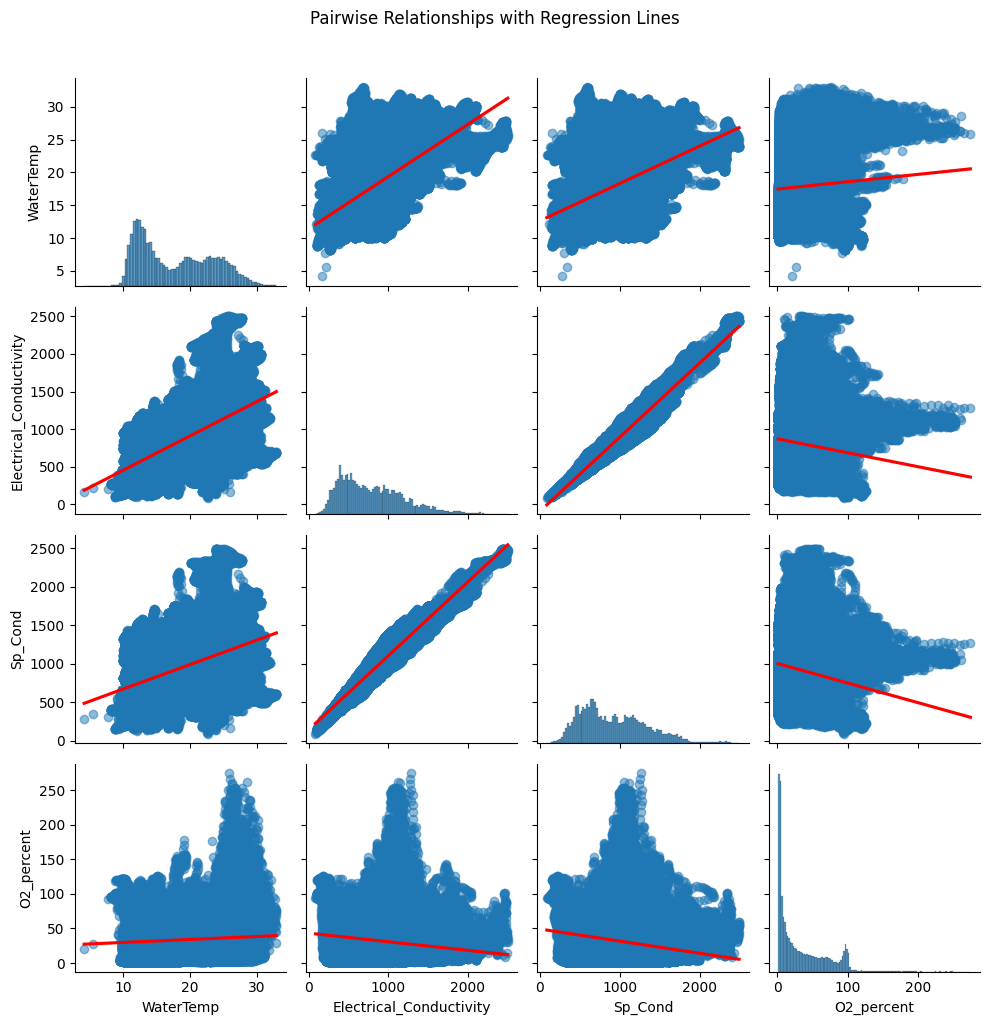

In [21]:
#  Scatter Plot Matrix with Regression Lines
sns.pairplot(df_plot, kind="reg", plot_kws={"line_kws":{'color':'red'}, "scatter_kws": {"alpha": 0.5}})
plt.suptitle("Pairwise Relationships with Regression Lines", y=1.02)
plt.tight_layout()
plt.show()

<ipython-input-25-0cddebb2e333>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["TIMESTAMP"] = pd.to_datetime(Cleaned_df_Adl_Zoo["TIMESTAMP"])


<Axes: xlabel='TIMESTAMP'>

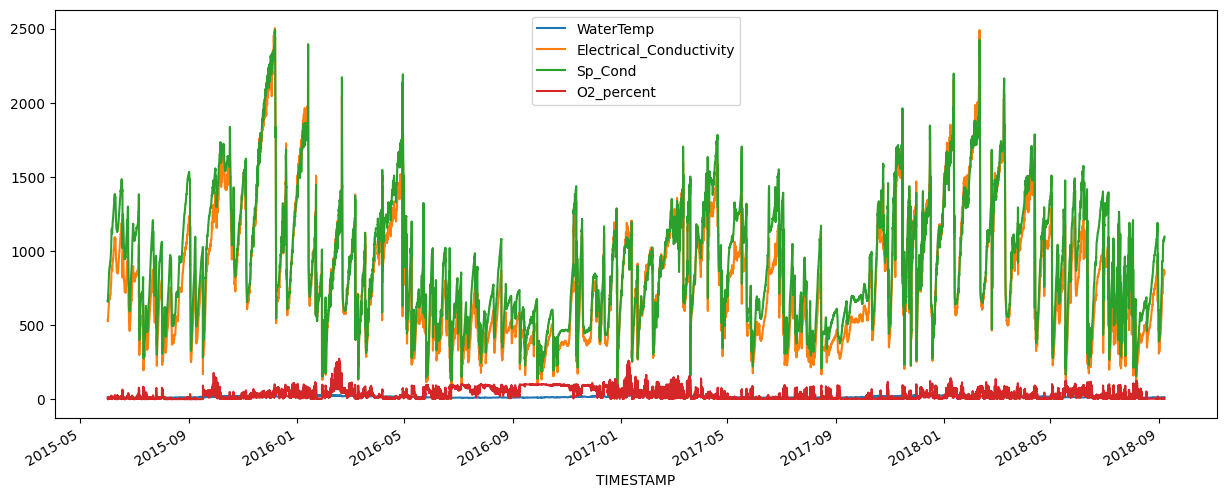

In [25]:
df_plot["TIMESTAMP"] = pd.to_datetime(Cleaned_df_Adl_Zoo["TIMESTAMP"])
df_plot.set_index("TIMESTAMP")[["WaterTemp", "Electrical_Conductivity", "Sp_Cond", "O2_percent"]].plot(figsize=(15,6))

<ipython-input-26-1f72959110a0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm[col] = (df_norm[col] - min_val) / (max_val - min_val)
<ipython-input-26-1f72959110a0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm["TIMESTAMP"] = pd.to_datetime(df_norm["TIMESTAMP"])


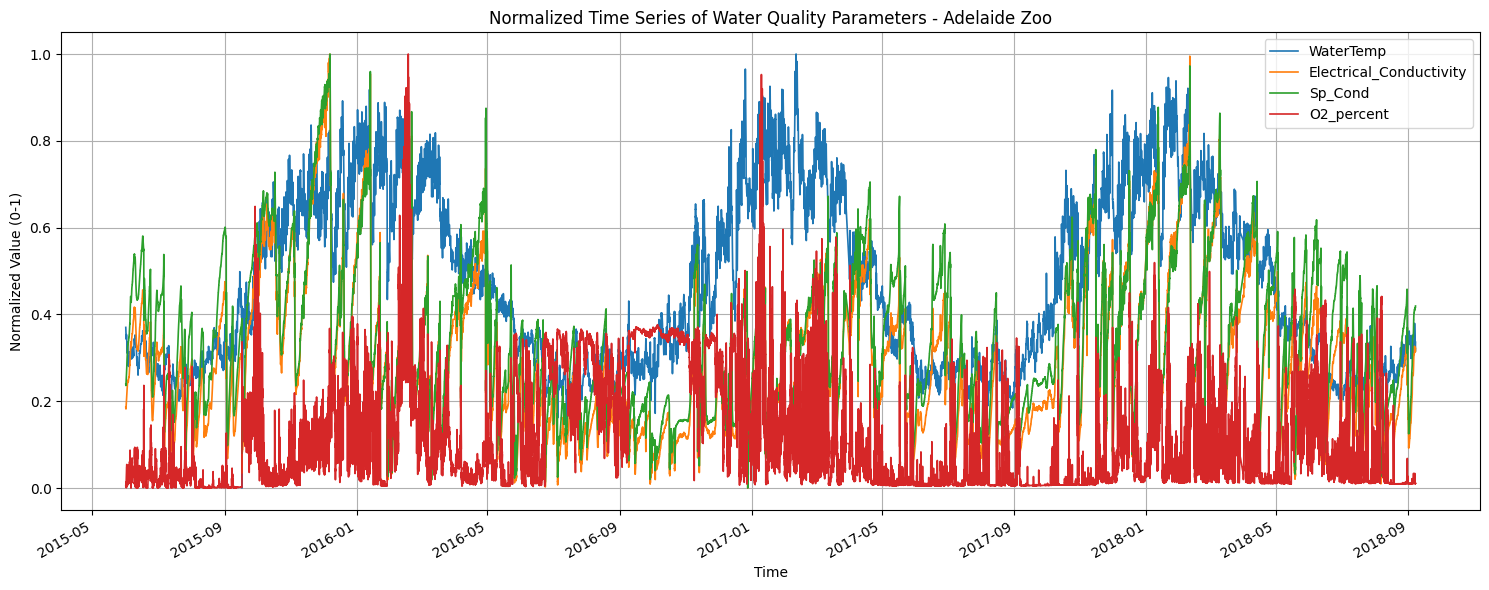

In [26]:
# lets do normalize the values of variables using min-max noramlization

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select and clean the columns
cols = ["WaterTemp", "Electrical_Conductivity", "Sp_Cond", "O2_percent", "TIMESTAMP"]
df_norm = Cleaned_df_Adl_Zoo[cols]

# Step 2: Normalize (Min-Max scaling)
for col in cols[:-1]:  # exclude TIMESTAMP
    min_val = df_norm[col].min()
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] - min_val) / (max_val - min_val)

# Step 3: Convert TIMESTAMP to datetime and set as index
df_norm["TIMESTAMP"] = pd.to_datetime(df_norm["TIMESTAMP"])
df_norm.set_index("TIMESTAMP", inplace=True)

# Step 4: Plot
plt.figure(figsize=(15, 6))
df_norm.plot(ax=plt.gca(), linewidth=1.2)
plt.title("Normalized Time Series of Water Quality Parameters - Adelaide Zoo")
plt.xlabel("Time")
plt.ylabel("Normalized Value (0-1)")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


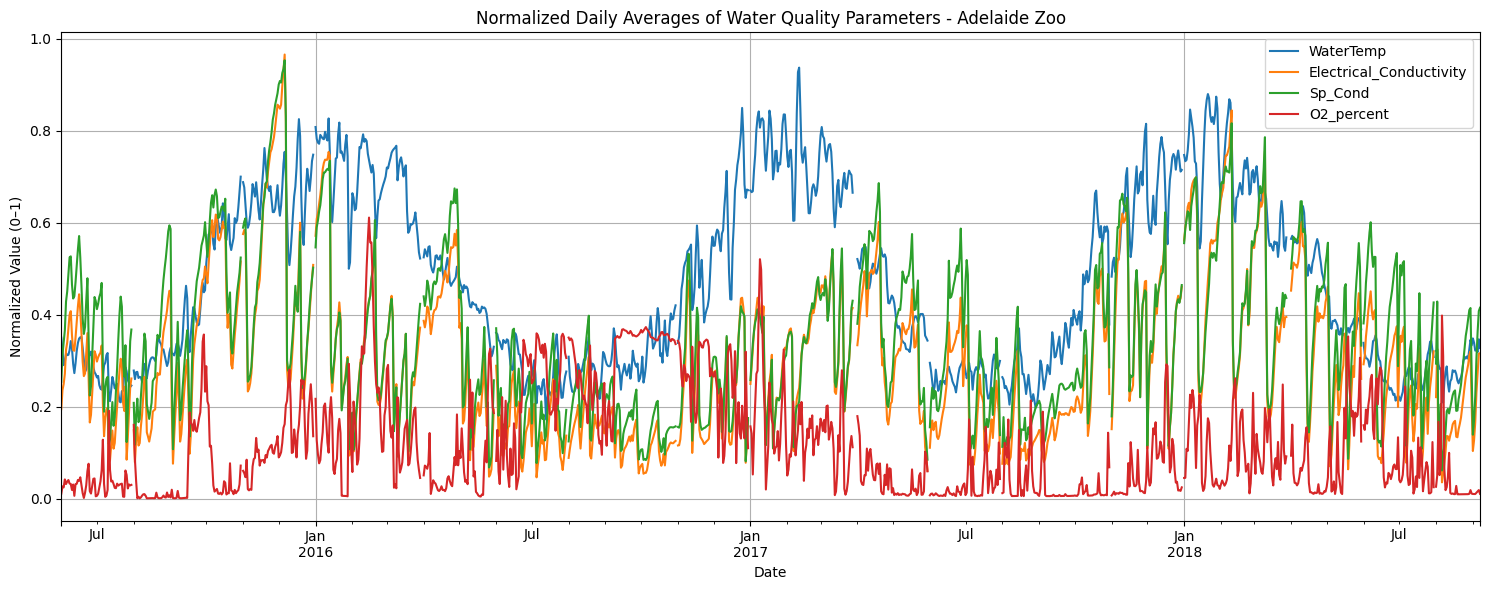

In [27]:
#  lets resample the normalized original data with collection gap of 15 min into daily

# Resample to daily frequency (mean)
daily_avg = df_norm.resample("D").mean()

plt.figure(figsize=(15, 6))
daily_avg.plot(ax=plt.gca(), linewidth=1.5)
plt.title("Normalized Daily Averages of Water Quality Parameters - Adelaide Zoo")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


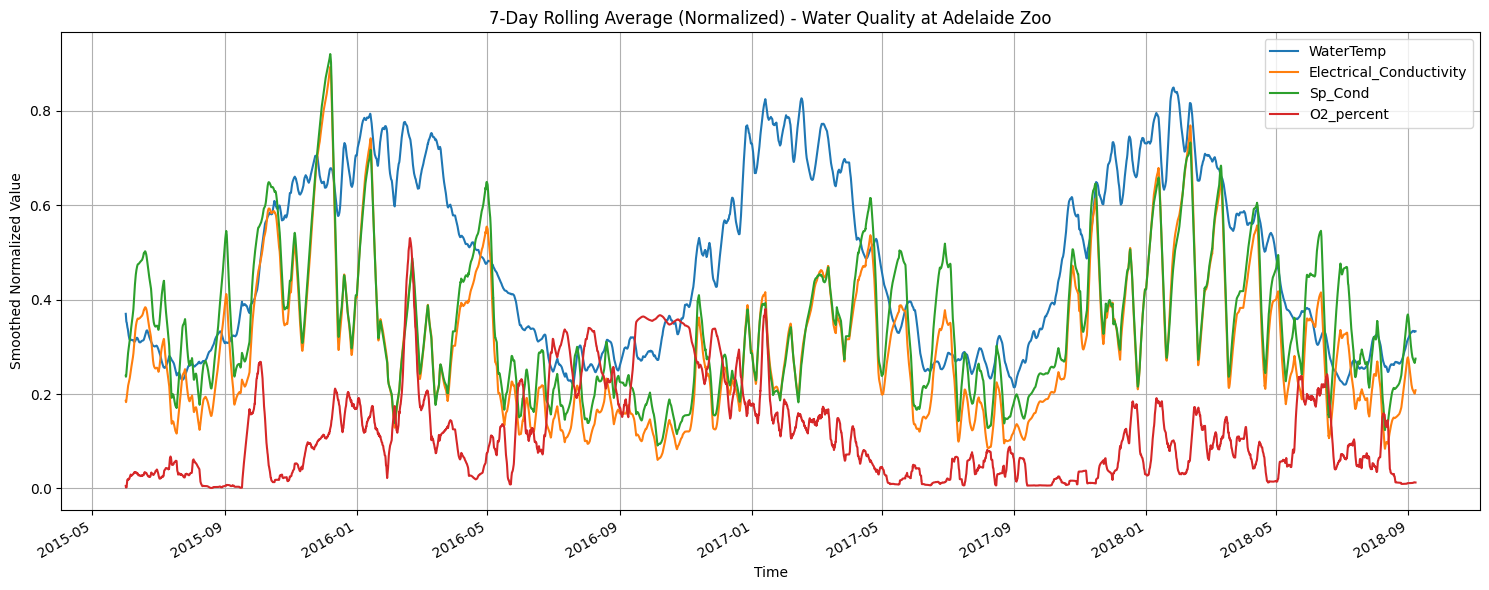

In [29]:
# Apply 7-day (7*24*4 = 672 interval) rolling average
rolling_avg = df_norm.rolling(window=672, min_periods=1).mean()

# Step 4: Plot
plt.figure(figsize=(15, 6))
rolling_avg.plot(ax=plt.gca(), linewidth=1.5)
plt.title("7-Day Rolling Average (Normalized) - Water Quality at Adelaide Zoo")
plt.xlabel("Time")
plt.ylabel("Smoothed Normalized Value")
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


<ipython-input-30-360303ad9430>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Monthly_avg = df_norm.resample("M").mean()


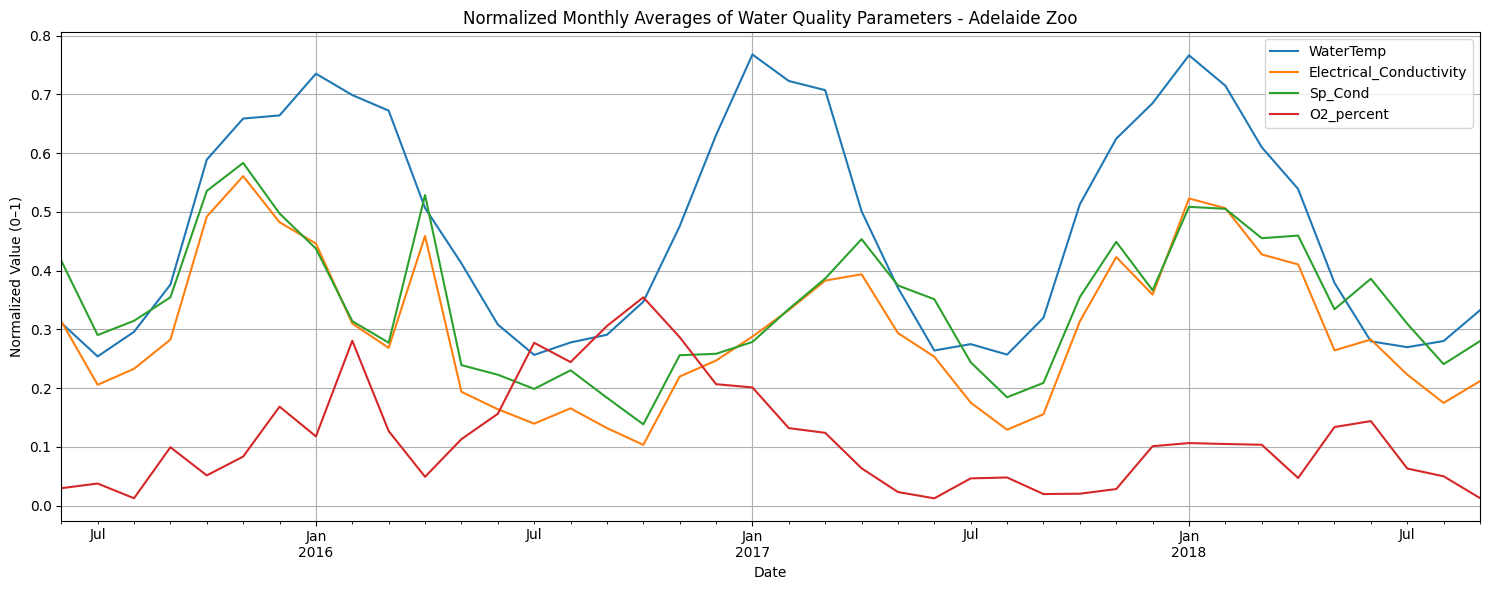

In [30]:
# Resample to Monthly frequency (mean)
Monthly_avg = df_norm.resample("M").mean()

plt.figure(figsize=(15, 6))
Monthly_avg.plot(ax=plt.gca(), linewidth=1.5)
plt.title("Normalized Monthly Averages of Water Quality Parameters - Adelaide Zoo")
plt.xlabel("Date")
plt.ylabel("Normalized Value (0–1)")
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


This montly frequency plot shows the clear view of percentange of oxygen in water is getting droped time, while others factors such as conductivity and temperature are fluctuating with season.
